In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

## Task 3

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<br>

## Task 4

**1. For the "Median value of owner-occupied homes" provide a boxplot**

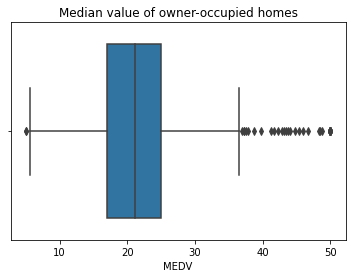

In [4]:
sns.boxplot(boston_df.MEDV)
plt.title('Median value of owner-occupied homes');

**2. Provide a  histogram for the Charles river variable.**

In [5]:
boston_df.CHAS.value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

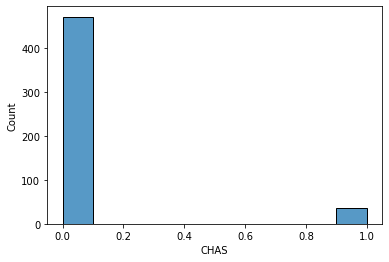

In [6]:
sns.histplot(boston_df.CHAS);

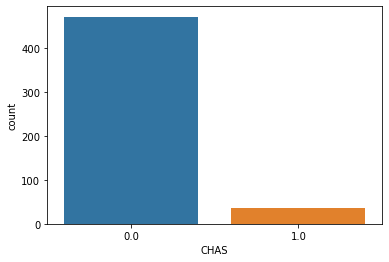

In [7]:
sns.countplot(boston_df.CHAS);

**3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [8]:
boston_df.loc[(boston_df['AGE']<=35, 'Age_Group')] = '35 and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70), 'Age_Group'] = 'between 35 and 70'
boston_df.loc[( boston_df['AGE'] >=70, 'Age_Group')] = '70 and older'

In [9]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and older


**4. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

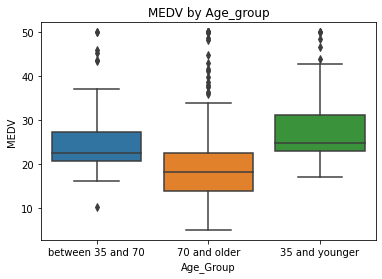

In [10]:
sns.boxplot(y = boston_df.MEDV, x = boston_df.Age_Group)
plt.title ("MEDV by Age_group");

**4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

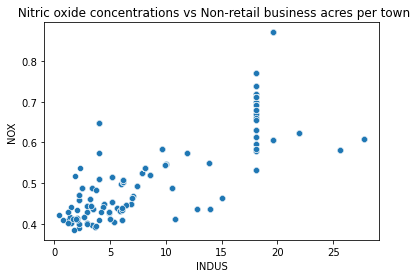

In [11]:
sns.scatterplot(y = boston_df.NOX, x = boston_df.INDUS)
plt.title(" Nitric oxide concentrations vs Non-retail business acres per town");

In [12]:
corr_coef, p_value = scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)
print("Corr_coef is {} and p value is {}".format(corr_coef,p_value))

Corr_coef is 0.7636514469209151 and p value is 7.913361061238693e-98


*Since the p value is less than 0.05 I would say that they are not strongly corralated.*

<br>

**5. Create a histogram for the pupil to teacher ratio variable.**

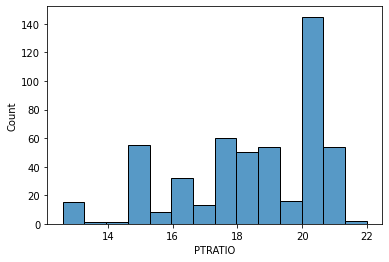

In [13]:
sns.histplot(boston_df.PTRATIO);

<br>

## Task 5

**1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

*H_0 : There is significance difference in median value of houses bounded by Charles river or not.* <br><br>
*H_1 :  There is not significance difference in median value of houses bounded by Charles river or not.*

In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

*Since the p value is less than 0.05, we reject the Null hypothesis and conclude there is not significant difference in median value of houses bounded by Charles river or not.*

<br>

**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?**

*H_O : There is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).* <br><br>
*H_1 : There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).* <br><br>

In [16]:
lower_35_MEDV = boston_df[boston_df['Age_Group'] =="35 and younger"]['MEDV']
between_35_and_70_MEDV = boston_df[boston_df['Age_Group'] =="between 35 and 70"]['MEDV']
older_70_MEDV = boston_df[boston_df['Age_Group'] =="70 and older"]['MEDV']

In [17]:
f_statistic, p_value = scipy.stats.f_oneway(lower_35_MEDV, between_35_and_70_MEDV, older_70_MEDV)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


*Since the p-value is less than 0.05, we reject the null hypotesis that there is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.

<br>

**3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**

*H_O : There is corralation between Nitric oxide concentrations and proportion of non-retail business acres per town.<br><br>
H_1 : There is no corralation between Nitric oxide concentrations and proportion of non-retail business acres per town.*

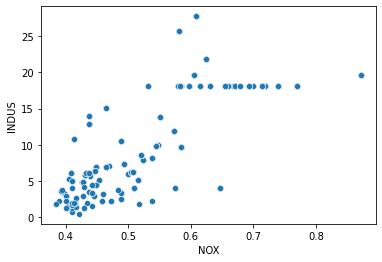

In [19]:
sns.scatterplot(x = boston_df.NOX, y = boston_df.INDUS);

In [21]:
corr_coef, p_value = scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)
print("Corr_coef is {} and p value is {}".format(corr_coef,p_value))

Corr_coef is 0.7636514469209151 and p value is 7.913361061238693e-98


*As a result, when we have a look at the coor-coef we have a value about 0.8 which demonstrates a strong corralation. Also since we have a p value which is less than 0.05, we fail to reject the null hypotesis.*


<br>

**4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?**

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('DIS ~ Age_Group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df       sum_sq     mean_sq           F        PR(>F)
Age_Group    2.0  1112.474663  556.237331  248.323988  9.611803e-76
Residual   503.0  1126.702981    2.239966         NaN           NaN


___

In [25]:
X = pd.get_dummies(boston_df[['Age_Group']])

In [26]:
y = boston_df.DIS
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     248.3
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           9.61e-76
Time:                        05:18:08   Log-Likelihood:                -920.51
No. Observations:                 506   AIC:                             1847.
Df Residuals:                     503   BIC:                             1860.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.4047      0.056     60.955      0.000       3.295       3.514
Age_Group_35 and younger        2.7965      0.124     22.515      0.000       2.552       3.041
Age_Group_70 and older         -0.8481      0.084    -10.120      0.000      -1.013      -0.683
Age_Group_between 35 and 70     1.4564      0.109     13.367      0.000       1.242       1.670
==============================================================================
Omnibus:                      112.855   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.232
Skew:                           1.195   Prob(JB):                     3.06e-52
Kurtosis:                       5.353   Cond. No.                     1.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

*Conclusion: p < 0.05 there is evidence of correlation between weighted distance to the five Boston employment centres and median value of owner occupied homes.*

___